# Кан Влдаислав
## AIN-2-22

#### 1)	Изучите материал лекции 12, проделайте пример, описанный в ходе работы. LDA

In [4]:
from sklearn.datasets import load_files
reviews_train = load_files("./aclImdb/train/")
# load_files возвращает коллекцию, содержащую обучающие тексты и обучающие метки
text_train, y_train = reviews_train.data, reviews_train.target

text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

reviews_test = load_files("./aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
# Мы строим модель и преобразуем данные в один этап
# Преобразование займет некоторое время,
# и мы можем сэкономить время, выполнив обе операции сразу
document_topics = lda.fit_transform(X)

In [11]:
lda.components_.shape

(10, 10000)

In [12]:
import numpy as np

# Для каждой темы (строки в components_) сортируем признаки (по возрастанию) 
# Инвертируем строки спомощью[:, ::-1], чтобы получить сортировку по убыванию
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Получаем имена признаков из векторизатора
feature_names = np.array(vect.get_feature_names_out())

In [14]:
import mglearn
# Выводим 10 тем:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        didn          girl          war           show          
dvd           nothing       kids          world         series        
game          actors        old           us            episode       
horror        book          guy           american      tv            
video         script        now           history       shows         
director      actually      going         against       episodes      
genre         thought       school        during        season        
quite         worst         want          years         television    
may           minutes       again         our           new           
work          read          years         german        now           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
funn

In [19]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [23]:
import numpy as np
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
cagney        house         kevin         opera         role          town          action        
keaton        jackson       paris         soap          cast          small         fight         
role          haunted       kane          bugs          moore         horror        holmes        
star          dead          ford          duvall        performance   city          sequences     
james         mansion       citizen       sutherland    actor         sheriff       guys          
parker        bear          jay           phantom       funny         hammer        hero          
day           ghost         vegas         bunny         played        lake          cop           
hollywood     twin          shakespeare   midnight      khan          local         fighting      
buster    

In [24]:
# сортируем документы по весу темы 45 "музыка"
music = np.argsort(document_topics100[:, 45])[::-1]
# печатаем 10 документов, в которых данная тема является наиболее важной
for i in music[:10]: # выводим первые два предложения
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'College students, who are clearing out a condemned dormitory, are stalked by an elusive killer.  The Dorm That Dripped Blood (aka Pranks) is a bit of a mixed bag for slasher fans.\n'
b'Good build up but this thriller is not always thrilling. There is one good sequence that is tense, but it is hard to care about the characters.\n'
b'Well, it\'s an interesting premise, but the director misses most of the opportunities it offers, managing only a handful of suspenseful moments. The film plays more like a whodunit than a horror film, but the "mystery" part is dreary, and the death scenes are silly and overwrought.\n'
b'This movie is great fun to watch if you love films of the organized crime variety. Those looking for a crime film starring a charismatic lead with dreams of taking over in a bad way may be slightly disappointed with the way this film strides.\n'
b"Despite its interesting premise, 'Sniper' is quite tedious. With a tighter script and sharper directing it could have been elect

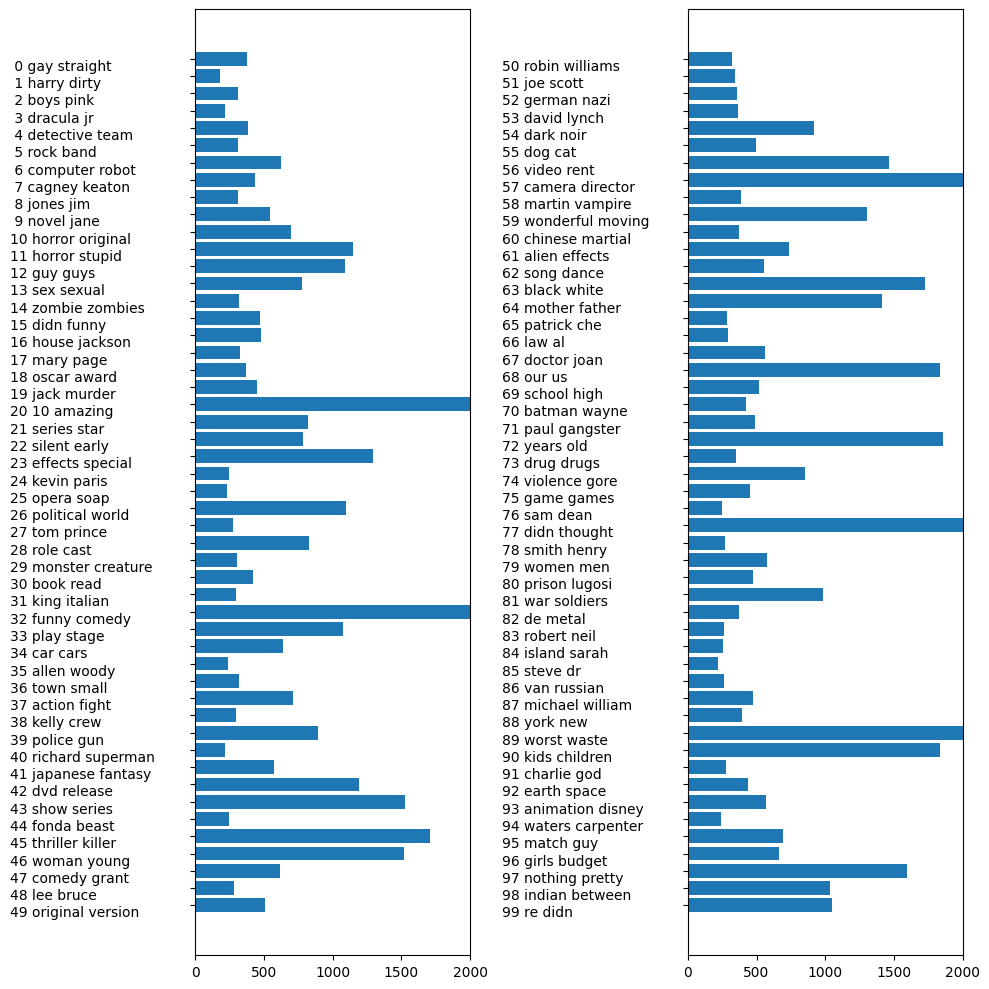

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

#### 2)	Создайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным.

In [4]:
reviews = [
    "Фильм был потрясающим, отличная актерская игра.",
    "Мне не понравился фильм, слишком затянутый сюжет.",
    "Очень интересный фильм, всем рекомендую!",
    "Фильм средний, ожидал большего.",
    "Не лучший фильм, но и не худший.",
    "Фантастический фильм! Обязательно к просмотру.",
    "Фильм оставил смешанные чувства.",
    "Сюжет предсказуемый, но все равно хороший фильм.",
    "Фильм удивил, очень понравился.",
    "Скучный фильм, не советую.",
    "Замечательная работа режиссера, фильм захватывает с первых минут.",
    "Диалоги в фильме были слишком затянутыми, местами скучновато.",
    "Яркие спецэффекты, но слабый сюжет.",
    "Фильм вызывает ностальгию, советую всем.",
    "Слишком много клише, но смотрится легко.",
    "Отличный фильм для семейного просмотра.",
    "Актерская игра была на высоте, особенно главного героя.",
    "Неожиданный поворот сюжета в конце, понравилось.",
    "Фильм слишком депрессивный, ожидал чего-то более легкого.",
    "Захватывающий сюжет, невозможно оторваться.",
    "Музыкальное сопровождение идеально дополняло атмосферу.",
    "Фильм оставил равнодушным, ничем не запомнился.",
    "Очень трогательная история, заставила задуматься.",
    "Понравились костюмы и декорации, выглядит великолепно.",
    "Фильм был слишком длинным, можно было сократить на час.",
    "Смешно и трогательно одновременно, понравится всем.",
    "Яркий и вдохновляющий фильм, обязательно к просмотру."
]

##### это набор отзывов о фильме, собранных из различных источников. Отзывы включают в себя как положительные, так и отрицательные мнения, что позволяет получить более полный обзор восприятия фильма аудиторией.

#### 3)	Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»

In [6]:
import nltk
from nltk.corpus import stopwords
try:
    stop_words = stopwords.words('russian')
except LookupError:
    nltk.download('stopwords')
    stop_words = stopwords.words('russian')

stop_words = set(stop_words)

print(vectorizer.get_feature_names_out())

['актерская' 'атмосферу' 'большего' 'вдохновляющий' 'великолепно' 'всем'
 'выглядит' 'вызывает' 'высоте' 'героя' 'главного' 'декорации'
 'депрессивный' 'диалоги' 'длинным' 'дополняло' 'задуматься'
 'замечательная' 'запомнился' 'заставила' 'затянутый' 'затянутыми'
 'захватывает' 'захватывающий' 'игра' 'идеально' 'интересный' 'история'
 'клише' 'конце' 'костюмы' 'легко' 'легкого' 'лучший' 'местами' 'минут'
 'музыкальное' 'невозможно' 'неожиданный' 'ничем' 'ностальгию'
 'обязательно' 'одновременно' 'ожидал' 'особенно' 'оставил' 'отличная'
 'отличный' 'оторваться' 'очень' 'первых' 'поворот' 'понравились'
 'понравилось' 'понравился' 'понравится' 'потрясающим' 'предсказуемый'
 'просмотра' 'просмотру' 'работа' 'равно' 'равнодушным' 'режиссера'
 'рекомендую' 'семейного' 'скучновато' 'скучный' 'слабый' 'слишком'
 'смешанные' 'смешно' 'смотрится' 'советую' 'сократить' 'сопровождение'
 'спецэффекты' 'средний' 'сюжет' 'сюжета' 'трогательная' 'трогательно'
 'удивил' 'фантастический' 'фильм' 'фильме

#### 4)	Масштабируйте данные с помощью tf-idf

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = list(stop_words)
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
X_tfidf = tfidf_vectorizer.fit_transform(reviews)
print(tfidf_vectorizer.get_feature_names_out())

['актерская' 'атмосферу' 'большего' 'вдохновляющий' 'великолепно' 'всем'
 'выглядит' 'вызывает' 'высоте' 'героя' 'главного' 'декорации'
 'депрессивный' 'диалоги' 'длинным' 'дополняло' 'задуматься'
 'замечательная' 'запомнился' 'заставила' 'затянутый' 'затянутыми'
 'захватывает' 'захватывающий' 'игра' 'идеально' 'интересный' 'история'
 'клише' 'конце' 'костюмы' 'легко' 'легкого' 'лучший' 'местами' 'минут'
 'музыкальное' 'невозможно' 'неожиданный' 'ничем' 'ностальгию'
 'обязательно' 'одновременно' 'ожидал' 'особенно' 'оставил' 'отличная'
 'отличный' 'оторваться' 'очень' 'первых' 'поворот' 'понравились'
 'понравилось' 'понравился' 'понравится' 'потрясающим' 'предсказуемый'
 'просмотра' 'просмотру' 'работа' 'равно' 'равнодушным' 'режиссера'
 'рекомендую' 'семейного' 'скучновато' 'скучный' 'слабый' 'слишком'
 'смешанные' 'смешно' 'смотрится' 'советую' 'сократить' 'сопровождение'
 'спецэффекты' 'средний' 'сюжет' 'сюжета' 'трогательная' 'трогательно'
 'удивил' 'фантастический' 'фильм' 'фильме

#### 5)	Использовать n-gram (1, 2, 3), pipeline(vectorizer, regressor)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 4))),
    ('classifier', LogisticRegression()),
])
y = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
pipeline.fit(reviews, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 4),
                                 stop_words=['когда', 'после', 'были', 'ему',
                                             'ведь', 'ты', 'чего', 'тем',
                                             'даже', 'или', 'конечно', 'потом',
                                             'моя', 'тоже', 'только', 'со',
                                             'них', 'вдруг', 'уже', 'об',
                                             'много', 'и', 'их', 'бы', 'что',
                                             'ни', 'был', 'тогда', 'им',
                                             'перед', ...])),
                ('classifier', LogisticRegression())])

#### Оценка модели

In [27]:
new_reviews = ["Невероятный фильм, рекомендую всем!", "Скучный фильм."]
predictions = pipeline.predict(new_reviews)
print("Предсказание:", predictions)
scores = cross_val_score(pipeline, reviews, y, cv=5)
print("Кросс-валидация:", scores)
print(f"Mean cross-validation score: {np.mean(scores):.2f}")
coefficients = pipeline.named_steps['classifier'].coef_
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()
top_positive_coefficients = np.argsort(coefficients[0])[-10:]
top_negative_coefficients = np.argsort(coefficients[0])[:10]

Предсказание: [1 0]
Кросс-валидация: [0.5        0.83333333 0.8        0.4        0.6       ]
Mean cross-validation score: 0.63


#### 6)	Исследуйте коэффициенты модели

In [28]:
import numpy as np

coefficients = pipeline.named_steps['classifier'].coef_
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

top_positive_coefficients = np.argsort(coefficients[0])[-10:]
top_negative_coefficients = np.argsort(coefficients[0])[:10]

print("Позитивные коэффициенты:\n", feature_names[top_positive_coefficients])
print("Негативные коэффициенты:\n", feature_names[top_negative_coefficients])

Позитивные коэффициенты:
 ['удивил очень понравился' 'игра' 'актерская игра' 'актерская' 'просмотру'
 'фильм обязательно просмотру' 'фильм обязательно' 'обязательно'
 'обязательно просмотру' 'очень']
Негативные коэффициенты:
 ['советую' 'оставил' 'фильм оставил' 'скучный' 'скучный фильм'
 'скучный фильм советую' 'фильм советую' 'лучший фильм' 'худший'
 'фильм худший']


#### 7)	Сделайте выводы по работе.

Проанализировали набор отзывов о фильмах. Для анализа использовались 27 отзывов, в которых выражались различные мнения о фильмах - от восторженных до критических.

Был создан мешок слов: собрали отзывы о фильмах и составили набор данных.
Стоп-слова: было создано множество стоп-слов и удалены из отзывов, чтобы сосредоточиться на значимых терминах.
TF-IDF масштабирование: данные были масштабированы с использованием метода TF-IDF, что позволило выделить значимые слова и фразы.
N-gram и обучение модели: спользовали N-gram (1, 2, 3) и настроили конвейер, включающий векторизацию TF-IDF и регрессию. Модель была обучена на отзывов и показала средний кросс-валидационный результат 0.63.
##### Результаты:
Позитивные коэффициенты: фразы, которые чаще всего встречались в положительных отзывах: «удивил очень понравился», «актерская игра», «просмотру».
Негативные коэффициенты: фразы, которые чаще встречались в отрицательных отзывах: «скучный фильм», «фильм оставил», «фильм советую».

Заключение: Анализ отзывов о фильмах с использованием методов обработки естественного языка и машинного обучения позволяет выявить ключевые аспекты, влияющие на восприятие зрителями. Модель показала способность различать положительные и отрицательные отзывы с приемлемой точностью, что может быть полезно для дальнейшего анализа и рекомендаций.